In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import linalg, lil_matrix

In [206]:
h = 0.02
x_l, x_r = 0, np.pi
y_l, y_r = 0, 1
lx, ly = np.abs(x_r - x_l), np.abs(y_r - y_l)
Nx, Ny = int(np.round(lx / h)), int(np.round(ly / h))
hx, hy = lx / Nx, ly / Ny

x = np.linspace(x_l + hx / 2, x_r - hx / 2, Nx)
y = np.linspace(y_l + hy / 2, y_r - hy / 2, Ny)

X, Y = np.meshgrid(x, y, indexing="ij")

In [207]:
print("Nx", Nx, "Ny", Ny)

Nx 157 Ny 50


In [208]:
def f(x, y):
    return - (9 * y - 10) * np.sin(4 * x) * np.exp(-5 * y)

# def phi_l(k1, k2):
#     return k1 * np.sin(2 * k1)
# 
# def phi_r(k1, k2):
#     return k1 * np.sin(2 * k1)

def phi_b(x):
    return -np.sin(4 * x)

def phi_t(x):
    return - ( 4 / np.exp(5) ) * np.sin(4 * x)

def real_solution(x, y):
    return np.sin(4 * x) * y * np.exp(-5 * y)

In [209]:
def RHS(X, Y, hx, hy):
    res = f(X, Y)
    res[:, 0] += phi_b(X[:, 0]) / hy
    res[:, -1] += phi_t(X[:, -1]) / hy
    
    res -= res.mean()

    return res

In [210]:
def getL(Nx, Ny, hx, hy):
    k = np.arange(Nx * Ny, dtype=int).reshape((Nx, Ny))
    L = lil_matrix((Nx * Ny, Nx * Ny))
    
    for i in range(Nx):
        for j in range(Ny):
            L[k[i, j], k[i, j]] += 2.0 / hx ** 2
            L[k[(i - 1) % Nx, j], k[i, j]] = -1.0 / hx ** 2
            L[k[(i + 1) % Nx, j], k[i, j]] = -1.0 / hx ** 2
            
            if j == 0:
                L[k[i, j], k[i, j]] += 1 / (hy ** 2)
                L[k[i, j], k[i, j + 1]] -= 1 / (hy ** 2)
            elif j == Ny - 1:
                L[k[i, j], k[i, j]] += 1 / (hy ** 2)
                L[k[i, j], k[i, j - 1]] -= 1 / (hy ** 2)
            else:
                L[k[i, j], k[i, j - 1]] -= 1 / (hy ** 2)
                L[k[i, j], k[i, j + 1]] -= 1 / (hy ** 2)
                L[k[i, j], k[i, j]] += 2 / (hy ** 2)
    
    return L.tocsr()

solution.mean


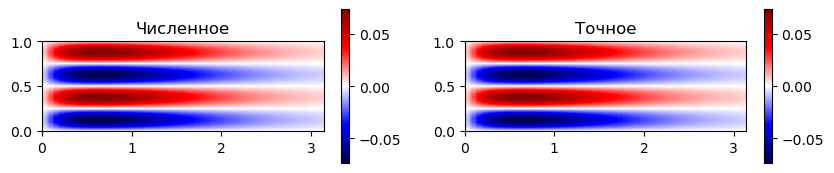

In [211]:
L = getL(Nx, Ny, hx, hy)
F = RHS(X, Y, hx, hy).flatten()
u = linalg.spsolve(L, F).reshape((Nx, Ny))
u -= u.mean()
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
im0 = ax[0].imshow(u, extent=(x_l, x_r, y_l, y_r), cmap='seismic', label='Численное')
ax[0].set_title('Численное')
plt.colorbar(im0, ax=ax[0], shrink=0.2)
solution = real_solution(X, Y)
print("solution.mean")
solution -= solution.mean()
im1 = ax[1].imshow(solution, extent=(x_l, x_r, y_l, y_r), cmap='seismic', label='Точное')
ax[1].set_title('Точное')
plt.colorbar(im1, ax=ax[1], shrink=0.2)

plt.show()

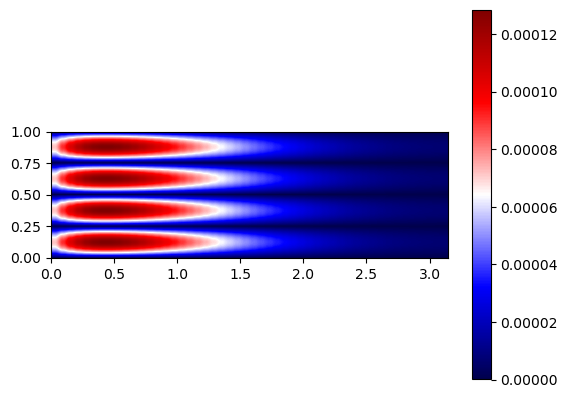

In [212]:
plt.imshow(np.abs(u - real_solution(X, Y)), extent=(x_l, x_r, y_l, y_r), cmap='seismic')
plt.colorbar()